# Project 2020 - Fundamentals of Data Analysis

---

### Project requirements:

Perform and explain simple linear regression using Python on the **powerproduction** dataset.
The goal is to;
- accurately predict wind turbine power output from wind speed values using the data set as a basis.
 1. using simple linear regression on the data set.
 2. In that notebook, an explanation of your regression and an analysis of its accuracy.

#### Methodology:

* Importing the data set
* Explore the data set
* Perform Analysis


To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.

In [1]:
#
# %matplotlib notebook

%matplotlib inline

# importing required packages and libraries
import numpy as np
rng = np.random.default_rng()
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Better sized plots.
plt.rcParams['figure.figsize'] = (12, 8)
# Nicer colours and styles for plots.
# plt.style.use("ggplot")
plt.style.use("fivethirtyeight")

In [2]:
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"
df = pd.read_csv(url, error_bad_lines=False)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
# transpose the data set
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
speed,0.0,0.125,0.15,0.225,0.275,0.325,0.400,0.450,0.501,0.526,...,24.499,24.525,24.575,24.65,24.75,24.775,24.85,24.875,24.95,25.0
power,0.0,0.000,0.00,0.000,0.000,4.331,5.186,3.826,1.048,5.553,...,0.000,0.000,0.000,0.00,0.00,0.000,0.00,0.000,0.00,0.0


In [4]:
# validating the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


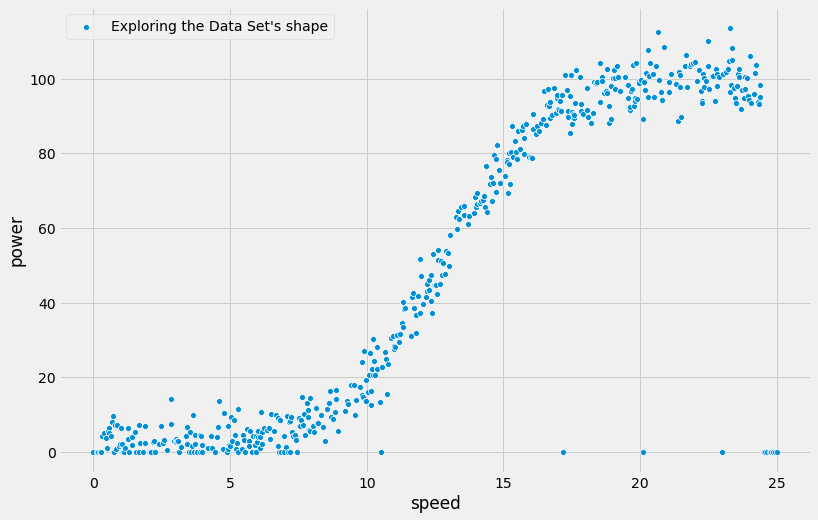

In [5]:
sns.scatterplot(data = df, x = "speed", y = "power", label = "Exploring the Data Set's shape")

<br>

---
## Simple Linear Regression using _`Numpy`_
---

In [6]:
# Do regression on the speed and power arrays using numpy.
np.polyfit(df["speed"], df["power"], 1)

array([  4.91759567, -13.89990263])

In [7]:
speed = df["speed"]
power = df["power"]

# Create variables with those values.
m, p = np.polyfit(speed, power, 1)

# Have a look at m and r.
m, p

(4.9175956654046695, -13.899902630519595)

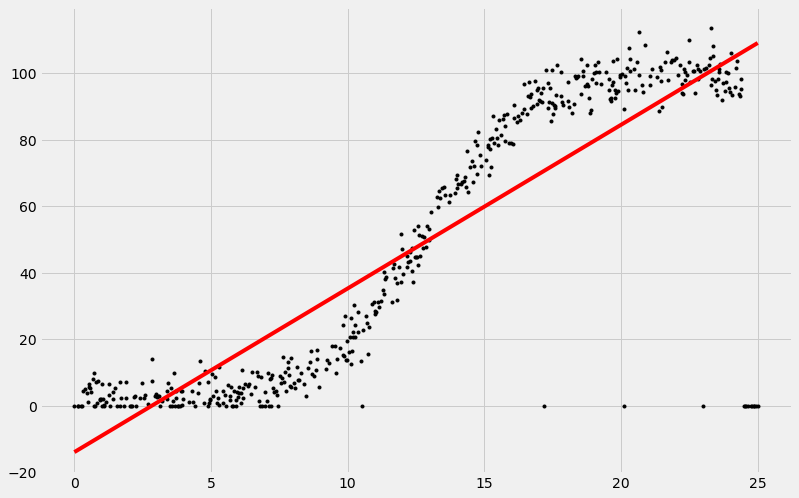

In [8]:
# Plot speed and power and the regression line in red.
plt.plot(speed, power, "k.")
plt.plot(speed, m * speed + p, "r-" )

### Calculating the best m and r ourselves

In [9]:
# Calculate mean speed and mean power.
speed_avg = np.mean(speed)
power_avg = np.mean(power)

# Subtract means from speed and power.
speed_zero = speed - speed_avg
power_zero = power - power_avg

# Dot product of mean-adjusted speed and power divided by dot product of mean adjusted speed with itself.
m = np.sum(speed_zero * power_zero) / np.sum(speed_zero * speed_zero)

# Subtract m times average x from average y.
p = power_avg - m * speed_avg

# Let's have a look - same values as above.
m, p

(4.917595665404668, -13.899902630519541)

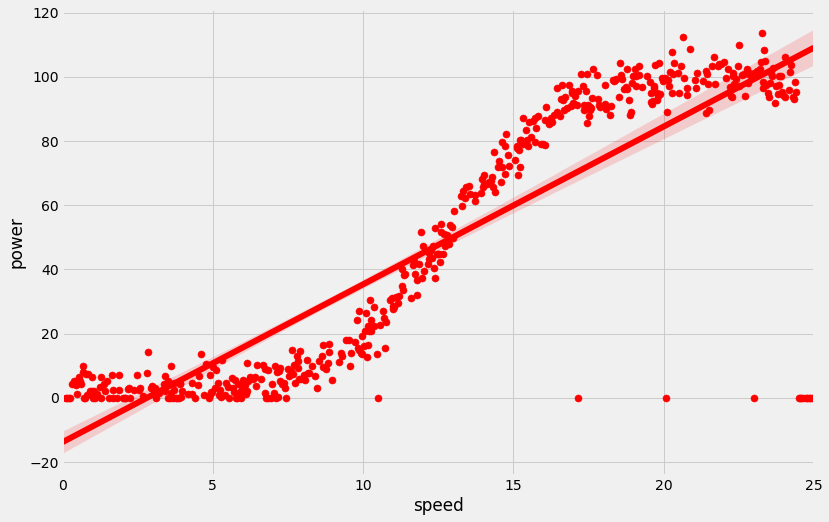

In [10]:
# simple linear regression by using seaborn [1]
sns.regplot(x = "speed", y = "power", data = df, x_estimator=np.mean, color = "r")


<br>

---

## Simple Linear Regression Using  _`Scikit-learn`_
---

In [11]:
def f(x, p):
    return p[0] + x * p[1]

### Train
---

In [12]:
# using linear_model : https://scikit-learn.org/stable/modules/linear_model.html 
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb 
# pda : Notebook: Models

import sklearn.linear_model as lim

speed = df["speed"].to_numpy()
power = df["power"].to_numpy()

speed = speed.reshape(-1, 1)

# Create a linear regression model instance.
m = lim.LinearRegression()

# Ask the model to fit the data.
m.fit(speed, power)


LinearRegression()

In [13]:

# Here's our intercept.
m.intercept_

-13.899902630519634

In [14]:

# The coefficients.
m.coef_

array([4.91759567])

In [15]:
# See how good the fit is.
m.score(speed, power)

0.7289360258564073

In [16]:
# training model
p = [m.intercept_, m.coef_[0]]
p

[-13.899902630519634, 4.9175956654046695]

### predict
---

In [17]:
# linear regression function

def predict(speed):
    """
    predicting the power using speed as input
    
    """
    return f(speed, p)

In [18]:
# f(x, p)

In [19]:
z = predict(speed)

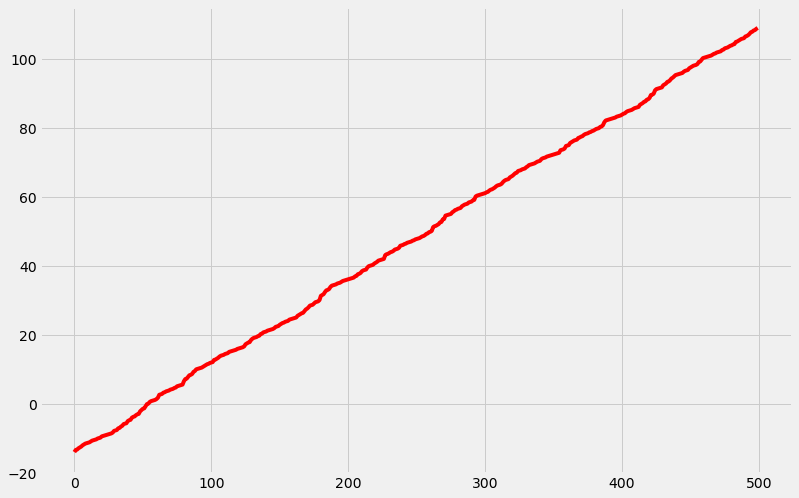

In [20]:
plt.plot(z, "r-")

<br>

---

##  Simple Linear Regression Using _`Statsmodels`_

---

In [21]:

# Using statsmodels.
import statsmodels.api as sm

# Tell statmodels to include an intercept.
speedwithp = sm.add_constant(speed)

# Create a model.
msm = sm.OLS(power, speedwithp)
# Fit the data.
psm = msm.fit()
# Print a summary.
print(psm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1339.
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.86e-143
Time:                        22:09:07   Log-Likelihood:                -2246.8
No. Observations:                 500   AIC:                             4498.
Df Residuals:                     498   BIC:                             4506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.8999      1.950     -7.128      0.0

<br>
<br>
<br>

---
<br>
<br>
<br>

##  https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb


In [22]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/knn-iris.ipynb
# Machine learning (sklearn) 
# pda

import sklearn.neighbors as nei
import sklearn.model_selection as mod
inputs = df["speed"].to_numpy()
outputs = df["power"].to_numpy()

inputs = inputs.reshape(-1, 1)

### Classifier

In [23]:
knn = nei.KNeighborsClassifier(n_neighbors=5)

### Fit

In [24]:
knn.fit(inputs, outputs)


ValueError: Unknown label type: 'continuous'

### Predict

In [ ]:
df.loc[5]

In [ ]:
knn.predict(0.325)

### Evaluate

In [ ]:
(knn.predict(inputs) == outputs).sum()

In [ ]:
inputs_train, inputs_test, outputs_train, outputs_test = mod.train_test_split(inputs, outputs, test_size=0.33)

In [ ]:
knn = nei.KNeighborsClassifier(n_neighbors=5)
knn.fit(inputs_train, outputs_train)

In [ ]:
(knn.predict(inputs_test) == outputs_test).sum()

## References

[1] Functions to draw linear regression models ; https://seaborn.pydata.org/tutorial/regression.html#functions-to-draw-linear-regression-models

[2] Ian McLoughlin; Models : https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/models.ipynb

[]

[]

[]

[]

[]